<a href="https://colab.research.google.com/github/Prasadchaskar/Eye-Disease/blob/main/eye_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
!unzip /content/drive/MyDrive/Eye_disease.zip

Archive:  /content/drive/MyDrive/Eye_disease.zip
   creating: Eye_disease/Bulging_Eyes/
  inflating: Eye_disease/Bulging_Eyes/aug_0_1035.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_1036.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_1038.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_1050.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_1062.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_113.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_1181.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_1186.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_1187.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_119.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_1192.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_12.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_1209.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_1278.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_1283.jpg  
  inflating: Eye_disease/Bulging_Eyes/aug_0_1300.jpg  
  inflating: Eye_disease/Bulging_Eye

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cv2
import numpy as np
import PIL

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 200
CHANNELS=3
EPOCHS=8

In [4]:
from pathlib import Path
my_path = Path(r'/content/Eye_disease')

In [5]:
eyes_images_dict = {
    'Bulging_Eyes': list(my_path.glob('Bulging_Eyes/*')),
    'Contracts': list(my_path.glob('Contracts/*')),
    'Crossed_Eyes': list(my_path.glob('Crossed_Eyes/*')),
    'Glaucoma': list(my_path.glob('Glaucoma/*')),
    'Uveitis': list(my_path.glob('Uveitis/*'))
}
eyes_labels_dict = {
    'Bulging_Eyes': 0,
    'Contracts': 1,
    'Crossed_Eyes': 2,
    'Glaucoma':3,
    'Uveitis':4
}

In [6]:
X = []
y = []

for name,images in eyes_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize = cv2.resize(img,(200,200))
        X.append(resize)
        y.append(eyes_labels_dict[name])

In [7]:
len(X)

2043

In [8]:
X = np.array(X)
y = np.array(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
X_train_scaled = X_train / 255
X_test_scaled = X_test /  255

In [26]:
from tensorflow.keras import  models,layers
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(4, 4),
                  activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(80,activation='relu'),
    layers.Dense(5,activation='softmax')
]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
52/52 [==============================] - 4s 59ms/step - loss: 3.6796 - accuracy: 0.2173
Epoch 2/10
52/52 [==============================] - 3s 57ms/step - loss: 1.4170 - accuracy: 0.3984
Epoch 3/10
52/52 [==============================] - 3s 56ms/step - loss: 1.0297 - accuracy: 0.6426
Epoch 4/10
52/52 [==============================] - 3s 56ms/step - loss: 0.6495 - accuracy: 0.8213
Epoch 5/10
52/52 [==============================] - 3s 57ms/step - loss: 0.3039 - accuracy: 0.9370
Epoch 6/10
52/52 [==============================] - 3s 57ms/step - loss: 0.1433 - accuracy: 0.9823
Epoch 7/10
52/52 [==============================] - 3s 56ms/step - loss: 0.0613 - accuracy: 0.9988
Epoch 8/10
52/52 [==============================] - 3s 56ms/step - loss: 0.0381 - accuracy: 0.9982
Epoch 9/10
52/52 [==============================] - 3s 56ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 10/10
52/52 [==============================] - 3s 56ms/step - loss: 0.0103 - accuracy: 1.0000


In [13]:
model.evaluate(X_test_scaled,y_test)

13/13 [==============================] - 1s 38ms/step - loss: 2.4042 - accuracy: 0.4303


[2.4042274951934814, 0.43031784892082214]

In [14]:
y_pred = list()
for i in model.predict(X_test_scaled):
  y_pred.append(np.argmax(i))
y_pred = np.array(y_pred)

In [29]:
from sklearn.metrics import  classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        80
           1       0.90      0.98      0.94        84
           2       0.93      0.91      0.92        85
           3       0.94      0.95      0.94        81
           4       0.97      0.95      0.96        79

    accuracy                           0.94       409
   macro avg       0.95      0.94      0.94       409
weighted avg       0.94      0.94      0.94       409



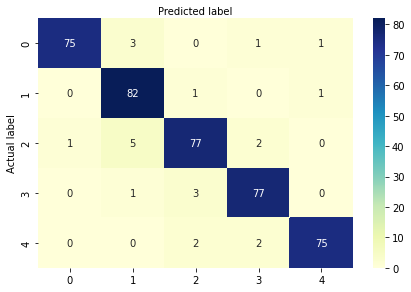

In [31]:
class_names = [0,1,2,3,4]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
                fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()